## Boilerplate code:

In [1]:
import sys
print(sys.version)

3.11.4 (main, Jul  5 2023, 08:40:20) [Clang 14.0.6 ]


In [57]:
# Typical imports
import numpy as np
from scipy.spatial import Delaunay
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from pylab import *
import cv2
import math

In [79]:
# My own helper functions
import julians_little_helpers 
from julians_little_helpers import * 
# For reloading my helper functions when I make changes to them
import importlib
importlib.reload(julians_little_helpers)

<module 'julians_little_helpers' from '/Users/julian/Code/cs180/proj3/code/julians_little_helpers.py'>

# Part 1: Defining Correspondences
For this I chose to use a picture of myself (the photo I took for my student ID lol) and the given photo of George Clooney. 


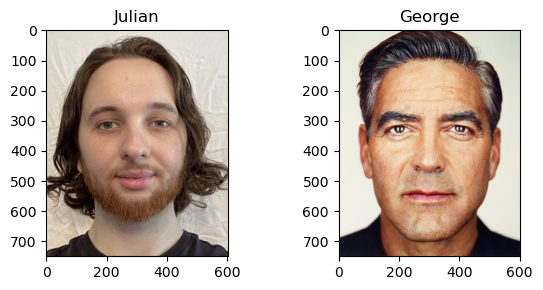

In [19]:
julian = read_im('../data/julian_portrait.jpg')
george = read_im('../data/george.jpg')
Display2Images(julian, george, 'Julian', 'George', 3)

#### Get the points I generated using this website: 
https://inst.eecs.berkeley.edu/~cs194-26/fa22/upload/files/proj3/cs194-26-aex/tool.html

(Thank you to whomever made this!)

In [71]:
# Import the correpsondence data
julian_pts, george_pts = GetPointsFromJSON('../data/julian_portrait_george.json')
julian_pts = np.array(julian_pts)
george_pts = np.array(george_pts)

#### Get the "mid-way" shape of our faces.
i.e. get the mean of each set of points

In [77]:
midway_pts = np.zeros_like(julian_pts)
for i in range(len(midway_pts)):
    mean_point = [julian_pts[i][0] + george_pts[i][0], julian_pts[i][1] + george_pts[i][1]]
    mean_point = [mean_point[0]//2, mean_point[1]//2]
    midway_pts[i] = mean_point

#### Calculate the Delaunay triangulation of the mid-way shape face.

In [80]:
midway_triangulation = GetTriangulationObject(midway_pts)

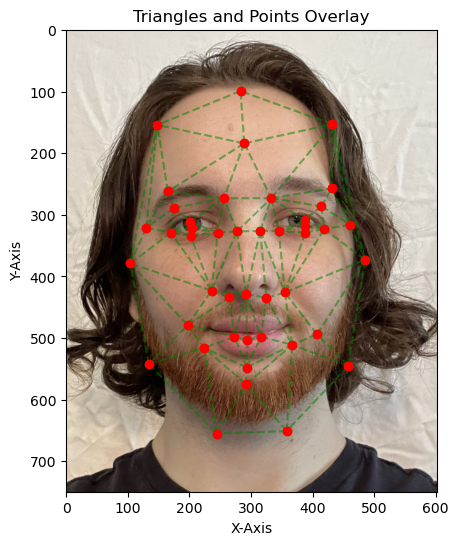

In [84]:
julian_tris = GetTriangulationObject(julian_pts)
DisplayFaceTrisAndPts(julian, midway_triangulation, midway_pts)

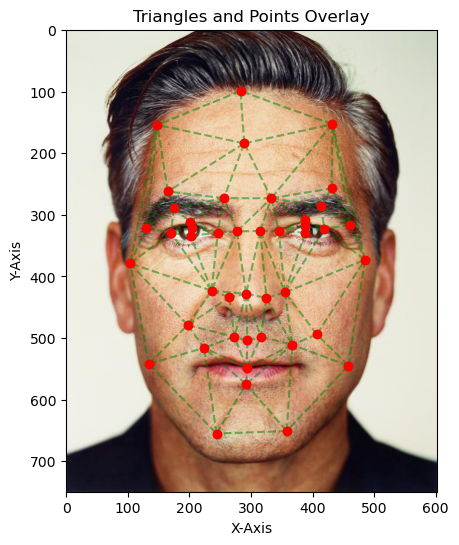

In [85]:
george_tris = GetTriangulationObject(george_pts)
DisplayFaceTrisAndPts(george, midway_triangulation, midway_pts)